___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)



In [30]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [31]:
import matplotlib
print(matplotlib.__version__)

3.2.2


In [32]:
df = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Wrangling

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23486.0,11742.500000,6779.968547,0.0,5871.25,11742.5,17613.75,23485.0
Clothing ID,23486.0,918.118709,203.298980,0.0,861.00,936.0,1078.00,1205.0
Age,23486.0,43.198544,12.279544,18.0,34.00,41.0,52.00,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.00,5.0,5.00,5.0
Recommended IND,23486.0,0.822362,0.382216,0.0,1.00,1.0,1.00,1.0
Positive Feedback Count,23486.0,2.535936,5.702202,0.0,0.00,1.0,3.00,122.0


In [35]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


AttributeError: ignored

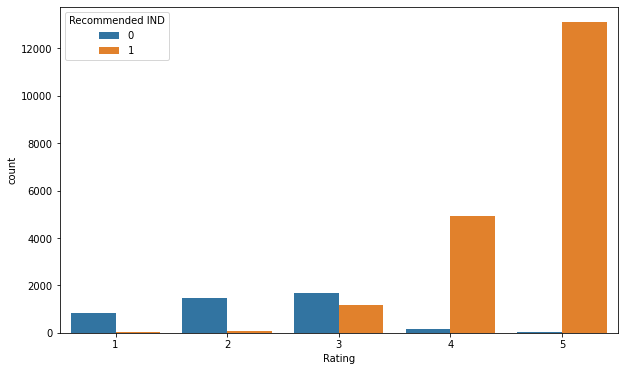

In [36]:
plt.figure(figsize = (10,6))
ax = sns.countplot(data = df, x ="Rating", hue = "Recommended IND")
for p in ax.containers:
  ax.bar_label(p)

# we can see how ratings and recomends of products are reflecting. As we see recommmended products are matches to ratings (positive)


AttributeError: ignored

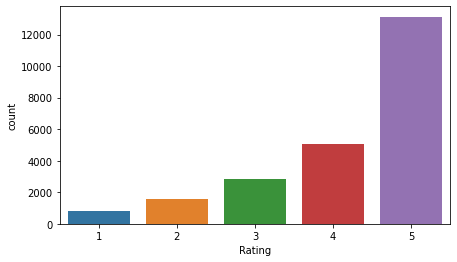

In [37]:
ax = sns.countplot(data =df, x = "Rating")
ax.bar_label(ax.containers[0]);

In [38]:
df["Rating"].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

AttributeError: ignored

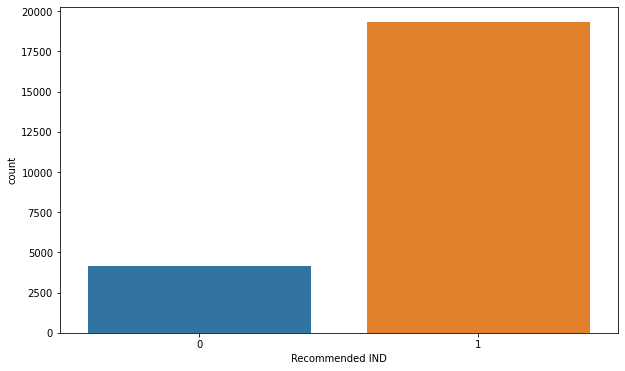

In [39]:
plt.fig = plt.figure(figsize = (10,6))
ax = sns.countplot(x="Recommended IND", data=df)
ax.bar_label(ax.containers[0]);

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [40]:
df2 = df.copy()
df2.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [41]:
df =df[["Review Text", "Recommended IND"]]
df.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [42]:
df.columns = ["text", "recommended_label"]
df.head()

,text,recommended_label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


### Missing Value Detection

In [43]:
df.isnull().sum()

text                 845
recommended_label      0
dtype: int64

In [44]:
df.dropna(inplace=True)

In [45]:
df.reset_index(drop=True, inplace=True)

In [46]:
df.tail()

,text,recommended_label
22636,I was very happy to snag this dress at such a ...,1
22637,"It reminds me of maternity clothes. soft, stre...",1
22638,"This fit well, but the top was very see throug...",0
22639,I bought this dress for a wedding i have this ...,1
22640,This dress in a lovely platinum is feminine an...,1


In [47]:
len(df)

22641

In [48]:
df.recommended_label.value_counts()

1    18540
0     4101
Name: recommended_label, dtype: int64

## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [49]:
stop_words = stopwords.words("english")
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [50]:
for i in ["not", "no"]:
        stop_words.remove(i)

In [51]:
def cleaning(data):
    
    #1. removing upper brackets to keep negative auxiliary verbs in text
    text = data.replace("'",'')
         
    #2. Tokenize and lower
    text_tokens = word_tokenize(text.lower()) 
    
    #3. Remove punkt and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords     
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #6. joining
    return " ".join(text_cleaned)

In [52]:
df['text'] = df['text'].apply(cleaning)
df.head()

,text,recommended_label
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [53]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [54]:
df['not_recommended'] = df['recommended_label'].map({0 : 1, 1: 0})
df

,text,recommended_label,not_recommended
0,absolutely wonderful silky sexy comfortable,1,0
1,love dress sooo pretty happened find store im ...,1,0
2,high hope dress really wanted work initially o...,0,1
3,love love love jumpsuit fun flirty fabulous ev...,1,0
4,shirt flattering due adjustable front tie perf...,1,0
...,...,...,...
22636,happy snag dress great price easy slip flatter...,1,0
22637,reminds maternity clothes soft stretchy shiny ...,1,0
22638,fit well top see never would worked im glad ab...,0,1
22639,bought dress wedding summer cute unfortunately...,1,0


In [55]:
positive_reviews = df[df["not_recommended"] == 0]["text"] 
positive_reviews

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
22635    wasnt sure ordering skirt couldnt see person f...
22636    happy snag dress great price easy slip flatter...
22637    reminds maternity clothes soft stretchy shiny ...
22639    bought dress wedding summer cute unfortunately...
22640    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 18540, dtype: object

In [56]:
negative_reviews = df[df["not_recommended"] == 1]["text"]
negative_reviews

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
22       first not pullover styling side zipper wouldnt...
25       loved material didnt really look long dress pu...
                               ...                        
22606    tried color really pretty fun donset want pair...
22607    wanted love jacket soft great color unfortunat...
22617    purchased good price typically love maeve fabr...
22634    surprised positive review product terrible cut...
22638    fit well top see never would worked im glad ab...
Name: text, Length: 4101, dtype: object

### Collect Words (positive and negative separately)

In [57]:
positive_words = " ".join(positive_reviews)
positive_words[:500]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh '

In [58]:
negative_words = " ".join(negative_reviews)
negative_words[:500]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would ta'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [59]:
from wordcloud import WordCloud

In [60]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
wordcloud_positive = WordCloud(background_color="black", max_words =250)

In [62]:
wordcloud_positive.generate(positive_words)

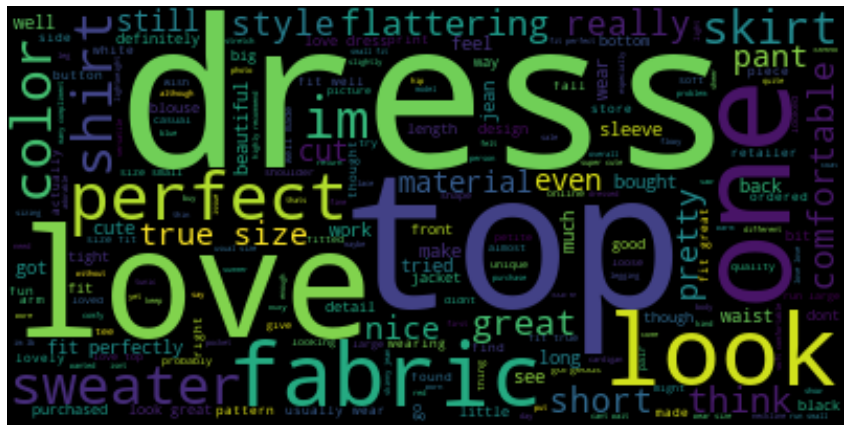

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()

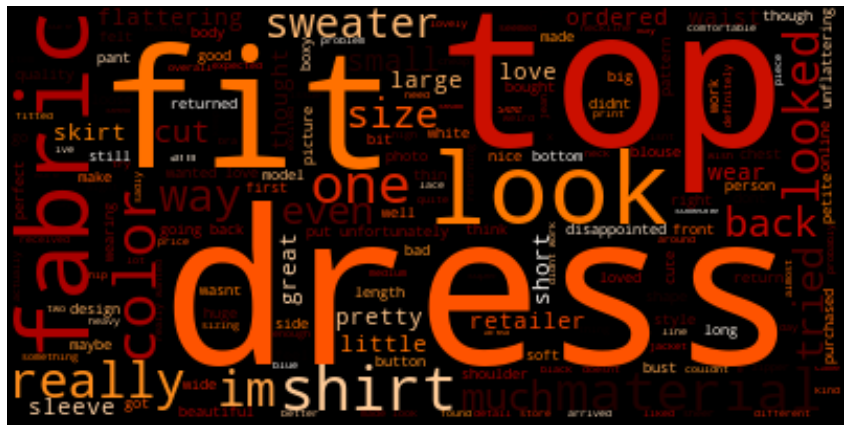

In [64]:
wordcloud_negative = WordCloud(background_color="black", max_words=250, colormap='gist_heat')

wordcloud_negative.generate(negative_words)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X = df["text"]
y = df["not_recommended"].astype(int)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=5)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) # ngram_range=(1,3), max_features= 1500
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [70]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [71]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,abundance,ac,accent,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessorizing,accessory,accident,accidental,...,yikes,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [74]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,abundance,ac,accent,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessorizing,accessory,accident,accidental,...,yikes,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
#eval

In [77]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

In [78]:
#po idee nijno dobavit ewe odnu funkciyu eval metric classification

## Logistic Regression

### CountVectorizer

In [79]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C=1, class_weight='balanced', random_state=101, max_iter=1000)
log.fit(X_train_count, y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [80]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[3278  431]
 [ 175  645]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      3709
           1       0.60      0.79      0.68       820

    accuracy                           0.87      4529
   macro avg       0.77      0.84      0.80      4529
weighted avg       0.89      0.87      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.92      0.96     14831
           1       0.74      0.96      0.83      3281

    accuracy                           0.93     18112
   macro avg       0.86      0.94      0.89     18112
weighted avg       0.94      0.93      0.93     18112



In [81]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring= ["accuracy", "f1", "recall", "precision"]

model = LogisticRegression(C =1, max_iter=1000, class_weight= "balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.869313
test_f1           0.685438
test_recall       0.786353
test_precision    0.607786
dtype: float64

### TF-IDF

In [82]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=1, class_weight='balanced', random_state=101, max_iter=1000)
log.fit(X_train_tf_idf, y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [83]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[3285  424]
 [ 170  650]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3709
           1       0.61      0.79      0.69       820

    accuracy                           0.87      4529
   macro avg       0.78      0.84      0.80      4529
weighted avg       0.89      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.89      0.93     14831
           1       0.64      0.83      0.72      3281

    accuracy                           0.88     18112
   macro avg       0.80      0.86      0.82     18112
weighted avg       0.90      0.88      0.89     18112



In [84]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision_neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall_neg': make_scorer(recall_score, average=None, labels=[1]),
            'f1_neg': make_scorer(f1_score, average=None, labels=[1])}

model = LogisticRegression(C=1, class_weight='balanced', random_state=101, max_iter=1000)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=5, return_train_score=True)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_neg,train_precision_neg,test_recall_neg,train_recall_neg,test_f1_neg,train_f1_neg
0,0.158224,0.006567,0.864201,0.893436,0.589912,0.641529,0.820122,0.933333,0.686224,0.760397
1,0.129947,0.006669,0.862821,0.892539,0.581967,0.640284,0.864536,0.927973,0.695652,0.757741
2,0.133771,0.006318,0.864992,0.892409,0.587618,0.639456,0.853659,0.931048,0.696085,0.758182
3,0.091925,0.006209,0.863335,0.892754,0.586096,0.639635,0.835366,0.934476,0.688875,0.759443
4,0.174047,0.006562,0.863335,0.895238,0.584826,0.647012,0.846037,0.928000,0.691589,0.762441


test_accuracy          0.863737
train_accuracy         0.893275
test_precision_neg     0.586084
train_precision_neg    0.641583
test_recall_neg        0.843944
train_recall_neg       0.930966
test_f1_neg            0.691685
train_f1_neg           0.759641
dtype: float64

## Naive Bayes 

### Countvectorizer

In [85]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.61061291, 0.61061291, 0.61061291, ..., 0.61061291, 0.61061291,
       0.61061291])

In [86]:
from sklearn.utils import class_weight

class_weights = dict(
    zip(np.unique(y_train),
        class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = np.unique(y_train), 
            y = y_train)
))
class_weights

{0: 0.6106129054008496, 1: 2.760134105455654}

In [87]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

nb = MultinomialNB(alpha=1)
nb.fit(X_train_count,y_train, sample_weight=classes_weights)

MultinomialNB(alpha=1)

In [88]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision_neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall_neg': make_scorer(recall_score, average=None, labels=[1]),
            'f1_neg': make_scorer(f1_score, average=None, labels=[1])}

model = MultinomialNB(alpha=1)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=5, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_neg,train_precision_neg,test_recall_neg,train_recall_neg,test_f1_neg,train_f1_neg
0,0.008609,0.009953,0.860889,0.879357,0.579332,0.610537,0.846037,0.922667,0.687732,0.734830
1,0.008152,0.007050,0.857853,0.879495,0.569745,0.611876,0.882801,0.915015,0.692537,0.733354
2,0.008507,0.006957,0.850083,0.880676,0.556898,0.613706,0.842988,0.921143,0.670710,0.736634
3,0.007841,0.006724,0.863335,0.876881,0.583767,0.605151,0.855183,0.921905,0.693878,0.730676
4,0.008278,0.006898,0.850083,0.882126,0.556444,0.617655,0.849085,0.916952,0.672299,0.738117


test_accuracy          0.856448
train_accuracy         0.879707
test_precision_neg     0.569237
train_precision_neg    0.611785
test_recall_neg        0.855219
train_recall_neg       0.919536
test_f1_neg            0.683431
train_f1_neg           0.734722
dtype: float64

In [89]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[3185  524]
 [ 111  709]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3709
           1       0.58      0.86      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.90      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     14831
           1       0.61      0.92      0.73      3281

    accuracy                           0.88     18112
   macro avg       0.79      0.89      0.83     18112
weighted avg       0.91      0.88      0.89     18112



In [90]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision_neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall_neg': make_scorer(recall_score, average=None, labels=[1]),
            'f1_neg': make_scorer(f1_score, average=None, labels=[1])}

model = MultinomialNB(alpha=1)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=5, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_neg,train_precision_neg,test_recall_neg,train_recall_neg,test_f1_neg,train_f1_neg
0,0.009018,0.007334,0.860889,0.879357,0.579332,0.610537,0.846037,0.922667,0.687732,0.734830
1,0.008307,0.006728,0.857853,0.879495,0.569745,0.611876,0.882801,0.915015,0.692537,0.733354
2,0.007912,0.006665,0.850083,0.880676,0.556898,0.613706,0.842988,0.921143,0.670710,0.736634
3,0.007924,0.006453,0.863335,0.876881,0.583767,0.605151,0.855183,0.921905,0.693878,0.730676
4,0.008103,0.006708,0.850083,0.882126,0.556444,0.617655,0.849085,0.916952,0.672299,0.738117


test_accuracy          0.856448
train_accuracy         0.879707
test_precision_neg     0.569237
train_precision_neg    0.611785
test_recall_neg        0.855219
train_recall_neg       0.919536
test_f1_neg            0.683431
train_f1_neg           0.734722
dtype: float64

### TF-IDF

In [91]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

nb = BernoulliNB(alpha=1)
nb.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

BernoulliNB(alpha=1)

In [92]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[3193  516]
 [ 113  707]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3709
           1       0.58      0.86      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.90      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     14831
           1       0.61      0.92      0.73      3281

    accuracy                           0.88     18112
   macro avg       0.79      0.89      0.83     18112
weighted avg       0.91      0.88      0.89     18112



In [93]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision_neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall_neg': make_scorer(recall_score, average=None, labels=[1]),
            'f1_neg': make_scorer(f1_score, average=None, labels=[1])}

model = BernoulliNB(alpha=1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=5, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_neg,train_precision_neg,test_recall_neg,train_recall_neg,test_f1_neg,train_f1_neg
0,0.010717,0.012464,0.864477,0.878321,0.586027,0.608291,0.856707,0.922286,0.695975,0.733081
1,0.010266,0.007589,0.858405,0.881910,0.570727,0.617867,0.884323,0.911966,0.693731,0.736648
2,0.012078,0.008011,0.850911,0.880331,0.558233,0.612699,0.847561,0.922667,0.673123,0.736394
3,0.010801,0.007716,0.861126,0.878813,0.579439,0.609198,0.850610,0.923429,0.689314,0.734101
4,0.010578,0.008009,0.853396,0.881504,0.563068,0.615816,0.850610,0.919619,0.677596,0.737662


test_accuracy          0.857663
train_accuracy         0.880176
test_precision_neg     0.571499
train_precision_neg    0.612775
test_recall_neg        0.857962
train_recall_neg       0.919993
test_f1_neg            0.685948
train_f1_neg           0.735577
dtype: float64

## Support Vector Machine (SVM)

### Countvectorizer

In [94]:
from sklearn.svm import LinearSVC, SVC
svc = LinearSVC(C=1, class_weight='balanced', random_state=101, max_iter=10000)
svc.fit(X_train_count, y_train)

LinearSVC(C=1, class_weight='balanced', max_iter=10000, random_state=101)

In [95]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[3285  424]
 [ 233  587]]
Test_Set
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3709
           1       0.58      0.72      0.64       820

    accuracy                           0.85      4529
   macro avg       0.76      0.80      0.78      4529
weighted avg       0.87      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     14831
           1       0.83      0.98      0.90      3281

    accuracy                           0.96     18112
   macro avg       0.91      0.97      0.94     18112
weighted avg       0.97      0.96      0.96     18112



In [96]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision_neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall_neg': make_scorer(recall_score, average=None, labels=[1]),
            'f1_neg': make_scorer(f1_score, average=None, labels=[1])}

model = LinearSVC(C=1, class_weight='balanced', random_state=101, max_iter=10000)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=5, return_train_score=True)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_neg,train_precision_neg,test_recall_neg,train_recall_neg,test_f1_neg,train_f1_neg
0,2.362177,0.006594,0.851504,0.971427,0.577836,0.869609,0.667683,0.990857,0.619519,0.926282
1,1.924894,0.006670,0.849296,0.968390,0.566150,0.857426,0.722983,0.990091,0.635027,0.918995
2,1.926710,0.006641,0.849255,0.970531,0.569444,0.864874,0.687500,0.992381,0.622928,0.924250
3,1.888822,0.006486,0.857813,0.970945,0.594378,0.867089,0.676829,0.991619,0.632929,0.925182
4,1.831447,0.006799,0.851187,0.970048,0.573585,0.866021,0.695122,0.987429,0.628532,0.922748


test_accuracy          0.851811
train_accuracy         0.970268
test_precision_neg     0.576279
train_precision_neg    0.865004
test_recall_neg        0.690023
train_recall_neg       0.990475
test_f1_neg            0.627787
train_f1_neg           0.923492
dtype: float64

### TD-IDF

In [97]:
from sklearn.svm import LinearSVC, SVC
svc = LinearSVC(C=1, class_weight='balanced', random_state=101, max_iter=10000)
svc.fit(X_train_tf_idf, y_train)

LinearSVC(C=1, class_weight='balanced', max_iter=10000, random_state=101)

In [98]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[3268  441]
 [ 166  654]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      3709
           1       0.60      0.80      0.68       820

    accuracy                           0.87      4529
   macro avg       0.77      0.84      0.80      4529
weighted avg       0.89      0.87      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     14831
           1       0.72      0.97      0.83      3281

    accuracy                           0.93     18112
   macro avg       0.86      0.95      0.89     18112
weighted avg       0.94      0.93      0.93     18112



In [99]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision_neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall_neg': make_scorer(recall_score, average=None, labels=[1]),
            'f1_neg': make_scorer(f1_score, average=None, labels=[1])}

model = LinearSVC(C=1, class_weight='balanced', random_state=101, max_iter=10000)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=5, return_train_score=True)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_neg,train_precision_neg,test_recall_neg,train_recall_neg,test_f1_neg,train_f1_neg
0,0.166795,0.006691,0.864201,0.935192,0.597156,0.743080,0.768293,0.981714,0.672000,0.845889
1,0.171211,0.006826,0.864201,0.933881,0.590164,0.741589,0.821918,0.974466,0.687023,0.842227
2,0.170736,0.006541,0.863059,0.934438,0.591954,0.741563,0.785061,0.979429,0.674967,0.844058
3,0.185670,0.006403,0.863335,0.934783,0.596177,0.743619,0.760671,0.976762,0.668453,0.844393
4,0.166723,0.006860,0.859470,0.936094,0.584775,0.747307,0.772866,0.977905,0.665791,0.847195


test_accuracy          0.862853
train_accuracy         0.934877
test_precision_neg     0.592045
train_precision_neg    0.743432
test_recall_neg        0.781762
train_recall_neg       0.978055
test_f1_neg            0.673647
train_f1_neg           0.844752
dtype: float64

## Random Forest

### Countvectorizer

In [100]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight="balanced", random_state=101)
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [101]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[3670   39]
 [ 579  241]]
Test_Set
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3709
           1       0.86      0.29      0.44       820

    accuracy                           0.86      4529
   macro avg       0.86      0.64      0.68      4529
weighted avg       0.86      0.86      0.83      4529

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14831
           1       1.00      1.00      1.00      3281

    accuracy                           1.00     18112
   macro avg       1.00      1.00      1.00     18112
weighted avg       1.00      1.00      1.00     18112



In [102]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision_neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall_neg': make_scorer(recall_score, average=None, labels=[1]),
            'f1_neg': make_scorer(f1_score, average=None, labels=[1])}

model = RandomForestClassifier(class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=5, return_train_score=True)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_neg,train_precision_neg,test_recall_neg,train_recall_neg,test_f1_neg,train_f1_neg
0,11.327871,0.196476,0.852884,1.0,0.821990,1.0,0.239329,1.0,0.370720,1.0
1,11.425189,0.145852,0.858405,1.0,0.824324,1.0,0.278539,1.0,0.416382,1.0
2,11.749283,0.146990,0.856433,1.0,0.817757,1.0,0.266768,1.0,0.402299,1.0
3,12.200641,0.146146,0.861679,1.0,0.870813,1.0,0.277439,1.0,0.420809,1.0
4,11.628294,0.154887,0.857813,1.0,0.821918,1.0,0.274390,1.0,0.411429,1.0


test_accuracy          0.857443
train_accuracy         1.000000
test_precision_neg     0.831360
train_precision_neg    1.000000
test_recall_neg        0.267293
train_recall_neg       1.000000
test_f1_neg            0.404328
train_f1_neg           1.000000
dtype: float64

### TF-IDF

In [103]:
rf = RandomForestClassifier(class_weight="balanced", random_state=101, n_jobs=-1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=101)

In [104]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[3660   49]
 [ 595  225]]
Test_Set
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3709
           1       0.82      0.27      0.41       820

    accuracy                           0.86      4529
   macro avg       0.84      0.63      0.67      4529
weighted avg       0.85      0.86      0.83      4529

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14831
           1       1.00      1.00      1.00      3281

    accuracy                           1.00     18112
   macro avg       1.00      1.00      1.00     18112
weighted avg       1.00      1.00      1.00     18112



In [105]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision_neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall_neg': make_scorer(recall_score, average=None, labels=[1]),
            'f1_neg': make_scorer(f1_score, average=None, labels=[1])}

model = RandomForestClassifier(class_weight="balanced", random_state=101, n_jobs=-1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=5, return_train_score=True)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_neg,train_precision_neg,test_recall_neg,train_recall_neg,test_f1_neg,train_f1_neg
0,10.550430,0.197757,0.861717,1.0,0.835498,1.0,0.294207,1.0,0.435175,1.0
1,9.266109,0.247473,0.854816,1.0,0.822660,1.0,0.254186,1.0,0.388372,1.0
2,10.956453,0.121282,0.857537,1.0,0.836538,1.0,0.265244,1.0,0.402778,1.0
3,9.755093,0.147860,0.862507,1.0,0.869159,1.0,0.283537,1.0,0.427586,1.0
4,7.597178,0.114825,0.852844,1.0,0.805970,1.0,0.246951,1.0,0.378063,1.0


test_accuracy          0.857884
train_accuracy         1.000000
test_precision_neg     0.833965
train_precision_neg    1.000000
test_recall_neg        0.268825
train_recall_neg       1.000000
test_f1_neg            0.406395
train_f1_neg           1.000000
dtype: float64

## Ada Boosting

### Countvectorizer

In [106]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50, random_state=101)
ada.fit(X_train_count, y_train, sample_weight=classes_weights)

AdaBoostClassifier(random_state=101)

In [107]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[3070  639]
 [ 173  647]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.83      0.88      3709
           1       0.50      0.79      0.61       820

    accuracy                           0.82      4529
   macro avg       0.72      0.81      0.75      4529
weighted avg       0.87      0.82      0.83      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.83      0.88     14831
           1       0.50      0.78      0.61      3281

    accuracy                           0.82     18112
   macro avg       0.72      0.81      0.75     18112
weighted avg       0.87      0.82      0.83     18112



In [108]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision_neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall_neg': make_scorer(recall_score, average=None, labels=[1]),
            'f1_neg': make_scorer(f1_score, average=None, labels=[1])}

model = AdaBoostClassifier(n_estimators=50, random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=5, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_neg,train_precision_neg,test_recall_neg,train_recall_neg,test_f1_neg,train_f1_neg
0,1.826261,0.087948,0.806790,0.824557,0.479167,0.510159,0.771341,0.793905,0.591121,0.621162
1,1.833423,0.078589,0.813414,0.818759,0.490909,0.499757,0.780822,0.783155,0.602820,0.610154
2,1.227127,0.060460,0.802595,0.807108,0.472456,0.480752,0.771341,0.808762,0.585987,0.603039
3,1.238155,0.061916,0.824959,0.817598,0.511179,0.497843,0.766768,0.791238,0.613415,0.611152
4,1.191964,0.060284,0.813087,0.820911,0.489573,0.503657,0.751524,0.787048,0.592904,0.614241


test_accuracy          0.812169
train_accuracy         0.817787
test_precision_neg     0.488657
train_precision_neg    0.498433
test_recall_neg        0.768360
train_recall_neg       0.792822
test_f1_neg            0.597250
train_f1_neg           0.611950
dtype: float64

### TF-IDF

In [109]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50, random_state=101)
ada.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

AdaBoostClassifier(random_state=101)

In [110]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3062  647]
 [ 201  619]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      3709
           1       0.49      0.75      0.59       820

    accuracy                           0.81      4529
   macro avg       0.71      0.79      0.74      4529
weighted avg       0.86      0.81      0.83      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.83      0.88     14831
           1       0.51      0.79      0.62      3281

    accuracy                           0.82     18112
   macro avg       0.73      0.81      0.75     18112
weighted avg       0.87      0.82      0.84     18112



In [111]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision_neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall_neg': make_scorer(recall_score, average=None, labels=[1]),
            'f1_neg': make_scorer(f1_score, average=None, labels=[1])}

model = AdaBoostClassifier(n_estimators=50, random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=5, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_neg,train_precision_neg,test_recall_neg,train_recall_neg,test_f1_neg,train_f1_neg
0,4.135472,0.087438,0.812310,0.822210,0.488095,0.505957,0.750000,0.792762,0.591346,0.617691
1,3.518552,0.062036,0.803754,0.823038,0.474138,0.507422,0.753425,0.781631,0.582011,0.615362
2,3.202009,0.059044,0.784097,0.804210,0.445026,0.476957,0.777439,0.835810,0.566038,0.607336
3,3.240674,0.059433,0.795417,0.795652,0.462356,0.463855,0.795732,0.821333,0.584874,0.592878
4,4.320199,0.094428,0.817504,0.824914,0.497472,0.510774,0.750000,0.794667,0.598176,0.621851


test_accuracy          0.802616
train_accuracy         0.814005
test_precision_neg     0.473418
train_precision_neg    0.492993
test_recall_neg        0.765319
train_recall_neg       0.805241
test_f1_neg            0.584489
train_f1_neg           0.611023
dtype: float64

## DL modeling

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [113]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [148]:
from gensim.models import Word2Vec
import re

### Tokenization

In [151]:
num_words = 15001
tokenizer = Tokenizer(num_words=num_words) 

In [ ]:
tokenizer.fit_on_texts(X)

### Creating word index

In [117]:
tokenizer.word_index

{'dress': 1,
 'fit': 2,
 'not': 3,
 'size': 4,
 'love': 5,
 'top': 6,
 'like': 7,
 'color': 8,
 'look': 9,
 'wear': 10,
 'great': 11,
 'im': 12,
 'would': 13,
 'fabric': 14,
 'small': 15,
 'really': 16,
 'ordered': 17,
 'little': 18,
 'perfect': 19,
 'one': 20,
 'flattering': 21,
 'soft': 22,
 'well': 23,
 'back': 24,
 'comfortable': 25,
 'cute': 26,
 'nice': 27,
 'bought': 28,
 'beautiful': 29,
 'bit': 30,
 'material': 31,
 'shirt': 32,
 'large': 33,
 'much': 34,
 'sweater': 35,
 'length': 36,
 'run': 37,
 'jean': 38,
 'also': 39,
 'work': 40,
 'petite': 41,
 'got': 42,
 'long': 43,
 'short': 44,
 'waist': 45,
 'quality': 46,
 'medium': 47,
 'skirt': 48,
 'think': 49,
 'pretty': 50,
 'even': 51,
 'retailer': 52,
 'x': 53,
 'make': 54,
 'feel': 55,
 'tried': 56,
 'pant': 57,
 'store': 58,
 'usually': 59,
 'get': 60,
 'way': 61,
 'sleeve': 62,
 'good': 63,
 'could': 64,
 'big': 65,
 'made': 66,
 'cut': 67,
 'go': 68,
 'dont': 69,
 'didnt': 70,
 'still': 71,
 'style': 72,
 'right': 73,
 

In [118]:
len(tokenizer.word_index)

11998

### Converting tokens to numeric

In [119]:
X_num_tokens = tokenizer.texts_to_sequences(X)

### Maximum number of tokens for all documents¶

In [120]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)


In [121]:
display(f"mean of tokens: {num_tokens.mean()}", f"max of tokens: {num_tokens.max()}")

'mean of tokens: 28.82986617198887'

'max of tokens: 59'

In [122]:
X[num_tokens.argmax()]

'liked shirt much ordered second one online size different color unfortunately second one much shorter first look le like tunic like cropped flowy top not good look second one going back otherwise shirt would get star wash well super soft comfy look great kind bottom jean cord legging wish came color typically wear l retailer top took l th'

In [123]:
max_tokens = 116

In [124]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [125]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [126]:
X_pad.shape

(22641, 116)

### Train Set Split

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=5)

### Modeling

In [129]:
model = Sequential()

In [130]:
embedding_size = 50

In [131]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))


model.add(GRU(units=48, return_sequences=True))
model.add(Dropout(0.5))

model.add(GRU(units=24))
model.add(Dense(1, activation='sigmoid'))

In [132]:
optimizer = Adam(lr=0.001)

In [133]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [134]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           750050    
                                                                 
 gru (GRU)                   (None, 116, 48)           14400     
                                                                 
 dropout (Dropout)           (None, 116, 48)           0         
                                                                 
 gru_1 (GRU)                 (None, 24)                5328      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 769,803
Trainable params: 769,803
Non-trainable params: 0
_________________________________________________________________


In [163]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           verbose=1, patience = 2, restore_best_weights=True)

## BERT Modeling

In [137]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 13.2 MB/s eta 0:00:00


### Read Data

In [160]:
df2 = pd.DataFrame(df[["Recommended IND", "Review Text"]].values, columns=['recommended', 'text'])
df2['not_recommended'] = df2['recommended'].map({0 : 1, 1: 0})
df2 = df2.dropna().reset_index(drop=True)
df2

,recommended,text,not_recommended
0,1,Absolutely wonderful - silky and sexy and comf...,0
1,1,Love this dress! it's sooo pretty. i happene...,0
2,0,I had such high hopes for this dress and reall...,1
3,1,"I love, love, love this jumpsuit. it's fun, fl...",0
4,1,This shirt is very flattering to all due to th...,0
...,...,...,...
22636,1,I was very happy to snag this dress at such a ...,0
22637,1,"It reminds me of maternity clothes. soft, stre...",0
22638,0,"This fit well, but the top was very see throug...",1
22639,1,I bought this dress for a wedding i have this ...,0


In [158]:
df2=df.copy
df2

<bound method NDFrame.copy of        Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
0                                                    NaN   
1                                                    NaN   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23481                     Great dress for many occasions   
23482                

In [178]:
X = df2['text']
y = df2['not_recommended']

In [190]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

KeyError: ignored

### Train test split

In [193]:
X = df2['text'].values
y = df2['not_recommended'].values

In [194]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=101)

### Tokenization

In [195]:
from transformers import AutoTokenizer

# cased or uncased
bert_model = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(bert_model)

In [196]:
# For every sentence...
max_token = []

for sent in X:
    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.    
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_token.append(len(input_ids))

print('Max sentence length: ', max(max_token))

Max sentence length:  162


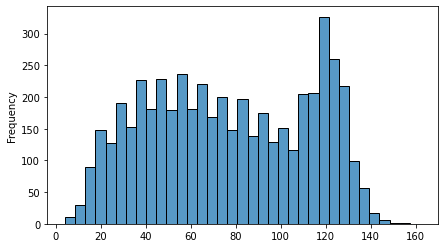

In [197]:
import seaborn as sns
sns.histplot(x=max_token, stat='frequency')

In [198]:
sum(np.array(max_token) < 163) / len(max_token)

1.0

In [199]:
seq_len = 163

### Transformation Matrix to Tensorflow tensor

In [185]:
def transformation(X, seq_len):
  # set array dimensions
  seq_len = seq_len
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i] = tokens['input_ids']
      Xmask[i] = tokens['attention_mask']
  return Xids, Xmask

In [200]:
Xids_train, Xmask_train = transformation(X_train, seq_len)

Xids_test, Xmask_test = transformation(X_test, seq_len)

In [201]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (19244, 163)
Xmask_train.shape : (19244, 163)
Xids_test.shape   : (3397, 163)
Xmask_test.shape  : (3397, 163)


In [202]:
pd.DataFrame(Xids_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162
0,101.0,2065.0,1996.0,4377.0,16142.0,1010.0,2045.0,2003.0,2498.0,2025.0,2000.0,2293.0,2055.0,2009.0,1012.0,1996.0,3609.0,1010.0,1997.0,3067.0,1010.0,2003.0,3599.0,2066.0,1996.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,101.0,1045.0,2293.0,8416.0,1004.0,2962.0,4253.0,1998.0,2031.0,2023.0,2544.0,1999.0,1037.0,2146.0,10353.0,2094.0,3797.0,1012.0,2009.0,2003.0,1037.0,2210.0,3482.0,2100.0,1010.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,101.0,2044.0,3752.0,2060.0,2111.0,1005.0,1055.0,4391.0,1010.0,1045.0,2001.0,4452.0,2009.0,2453.0,2022.0,2205.0,2146.0,1012.0,1045.0,3641.0,1996.0,3180.0,1060.0,2015.0,2004.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,101.0,2023.0,2003.0,1037.0,2307.0,18785.0,2005.0,4201.0,2067.0,5353.0,17828.0,1012.0,1996.0,2503.0,1997.0,1996.0,4139.0,7840.0,2003.0,3730.0,1010.0,2066.0,28095.0,3430.0,1010.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,101.0,1045.0,2293.0,2023.0,4377.0,999.0,2009.0,2003.0,6625.0,1998.0,3492.0,1010.0,2092.0,2081.0,1998.0,4438.0,1012.0,2009.0,7926.0,2646.0,1996.0,3469.0,2946.0,2174.0,2009.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3392,101.0,10966.0,2467.0,2038.0,2081.0,3737.0,5929.0,1998.0,1045.0,2018.0,4156.0,1996.0,2168.0,3797.0,1999.0,2178.0,3609.0,1998.0,1045.0,2359.0,2000.0,2156.0,2065.0,2027.0,2018.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3393,101.0,1045.0,3866.0,1996.0,2801.0,2369.0,2023.0,3797.0,2021.0,2009.0,2074.0,17991.0,2105.0,1996.0,5808.0,2007.0,6197.0,1997.0,4469.0,8313.0,1012.0,1045.0,8343.0,1996.0,2944.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3394,101.0,2023.0,4377.0,2003.0,1037.0,2147.0,1997.0,2396.0,2119.0,3784.0,1998.0,1999.0,2711.0,1012.0,1996.0,3609.0,2003.0,2062.0,17026.0,1999.0,2711.0,1998.0,2119.0,6087.0,2024.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3395,101.0,1045.0,2428.0,4669.0,2023.0,4003.0,10762.0,1012.0,2009.0,2003.0,2092.0,2081.0,1998.0,2200.0,3492.0,1012.0,1045.0,2097.0,4929.0,2009.0,2043.0,2009.0,4152.0,1037.0,2210.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
pd.DataFrame(Xmask_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3392,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3393,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3394,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3395,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [204]:
labels_train = y_train.reshape(-1,1)
labels_test = y_test.reshape(-1,1)

labels_train.shape, labels_test.shape

((19244, 1), (3397, 1))

In [209]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))

dataset_train, dataset_test

(<TensorSliceDataset element_spec=(TensorSpec(shape=(163,), dtype=tf.float64, name=None), TensorSpec(shape=(163,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>,
 <TensorSliceDataset element_spec=(TensorSpec(shape=(163,), dtype=tf.float64, name=None), TensorSpec(shape=(163,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>)

In [210]:
def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

In [211]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

### Batch Size

In [212]:
batch_size = 32 # 16, 32

# batch_size 
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size) 

length = len(X_train)
train_ds2 = dataset_train.shuffle(buffer_size = length, reshuffle_each_iteration=True).batch(batch_size) 

### Creating optimization

### Creating Model

In [213]:
bert_model, seq_len

('bert-base-uncased', 163)

In [214]:
def create_model(model, seq_len):
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained(model)
    input_ids = tf.keras.layers.Input(shape=(seq_len,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(seq_len,), name='attention_mask', dtype='int32')
    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = tf.keras.layers.Dense(seq_len, activation='relu')(embeddings)
    x = tf.keras.layers.Dropout(0.2, name="dropout")(x) #0.1
    # x = tf.keras.layers.BatchNormalization()(x)
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

In [216]:
# Declaring the exponential number
exp_number = "{:e}".format(1.5e-05)

# Converting it to float data type
float_number = "{:f}".format(float(exp_number))

# Printing the converted number
print("Float Number:",float_number)
print("Exponent Number:",exp_number)

Float Number: 0.000015
Exponent Number: 1.500000e-05


In [217]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           750050    
                                                                 
 gru (GRU)                   (None, 116, 48)           14400     
                                                                 
 dropout (Dropout)           (None, 116, 48)           0         
                                                                 
 gru_1 (GRU)                 (None, 24)                5328      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 769,803
Trainable params: 769,803
Non-trainable params: 0
_________________________________________________________________


In [218]:
from sklearn.utils import class_weight

class_weights = dict(
    zip(np.unique(y_train),
        class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = np.unique(y_train), 
            y = y_train)
))
class_weights

{0: 0.610610483563904, 1: 2.7601835915088926}

In [219]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode="min", 
                           verbose = 1, patience = 1, restore_best_weights=True)

### Model evaluation

In [223]:
# metrics = ['loss', 'recall', 'precision', 'accuracy', 'auc', 'precision_at_recall']
colors  = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_metrics(history, metrics):
  for n, metric in enumerate(metrics):
    name = str(metric).replace("_"," ").capitalize()
    plt.subplot(3, 2, n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    else:
      # plt.ylim(plt.gca().get_ylim())
      plt.ylim([plt.ylim()[0], 1])

    plt.legend();

### Compare Models F1 Scores, Recall Scores and Average Precision Score

Accuracy Comparison

Precision Score Comparison

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___